<a href="https://colab.research.google.com/github/Wizzzzzzard/grokking-algorithms-notes/blob/main/6_Graphs_and_Breadth_first_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is a graph?

A graph models a set of connections. Each graph is mae up of nodes and edges. A node can be directly connected to many other nodes. Those nodes area called its neighbours. 

Graphs are a way to model how different things are connected to one another.

##Breadth-first Search

Similar to binary search, breadth-first search is a different kind of search algorithm: one that runs on graphs. It can help to answer two kinds of questions:


1.   *Is there a path from node A to node B?*
2.   *What is the shortest path from node A to node B?*

The algorithm works by radiating outwards from the starting point. It will always check and exhaust the entire list of first-degree connections before moving on to second-degree connections and so. It is therefore important to search people in the order they are added as otherwise second-degree connections could potentially be searched before first-degree ones. The data structure to handle this is called a ***queue***.



##Queues
A queue works exactly like it does in real life. Suppose you and your friend are queueing up at the bus stop. If you're before him then you get on the bus first. A queue works the same way way.

Queues are similar to stacks- you can't access random elements in the queue. Instead there are only two options: ***enqueue*** and ***dequeue***.

If you enqueue two items to the list, the first item you add will be dequeued before the second item. This can be used for a search list, people who are added to the list first will be dequeued and searched first.

The ***queue*** is called a ***FIFO*** data structure: ***First In, First Out***. In contrast, a ***stack*** is a ***LIFO*** data structure: ***Last In, First Out***.

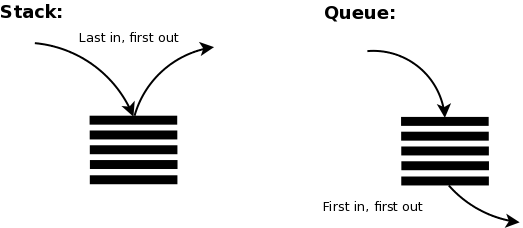

#Implementing the Graph

First you need to implement the graph in code. A graph consists of several nodes, with each node connected to neighbouring nodes. How do you express a relationship like "you -> bob"?

This can be done using a hash table as it allows you to map a key to a value. In this case you want to map a node to all of its neighbours.

In [ ]:
graph = {}
graph{"you"} = ["alice", "bob", "claire"]

Notice that "you" is mapped to an array. So `graph["you"]` will give an array of all the neighbours around "you".

To represent a bigger graph like the one below is not much more difficult.

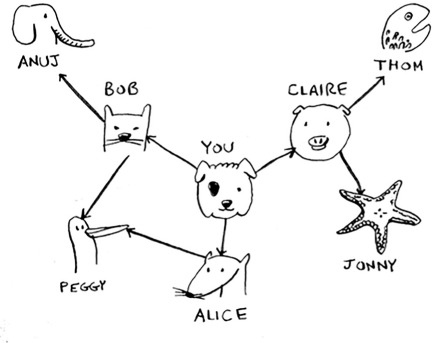

In [10]:
graph = {}
graph["you"] = ["alice", "bob", "claire"]
graph["bob"] = ["anuj", "peggy"]
graph["alice"] = ["peggy"]
graph["claire"] = ["thom", "johnny"]
graph["anuj"] = []
graph["peggy"] = []
graph["thom"] = []
graph["johnny"] = []

Does it matter what order you add the key/value pairs in? I.e. does it matter if you write


```
graph["claire"] = ["thom", "johnny"]
graph["anuj"] = []

```
instead of

```
graph["anuj"] = []
graph["claire"] = ["thom", "johnny"]
```
Answer: It doesn't matter. Hash tables have no ordering, so it doesn't matter what order you add key/value pairs in.

Anuj,Peggy, Thom and Johnny don't have any neighbours. They have arrows pointing to them, but no arrows from them to someone else. This is called a *directed graph* - the relationship is only one way. So Anuj is Bob's neighbour but Bob isn't Anuj's neighbour. An *undirected graph* doesn't have any arrows and both nodes are each other's neighbours. For example, both of these graphs are equal.

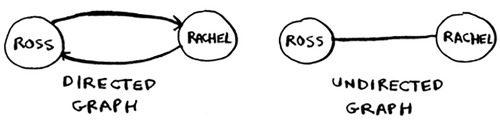

#Implementing the Algorithm
To recap here's an overview of the implementation of the algorithm.

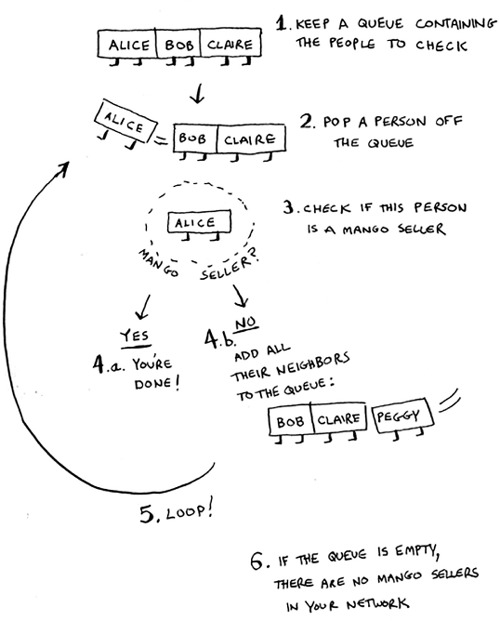


In [2]:
def person_is_seller(name):
  return name[-1] == 'm' # test function, if name ends in 'm' they are a mango seller

from collections import deque # deque is double-ended queue function

search_queue = deque() # create new queue
search_queue += graph["you"] # adds all of your neighbours to the search queue

while search_queue: # while the queue isn't empty
  person = search_queue.popleft() # ..grabs the first person off the queue
  if person_is_seller(person): # checks whether the person is a mango seller
    print(person + " is a mango seller!") # yes they're a mango seller
  else:
    search_queue += graph[person] # no they aren't, add all of the person's friends (connections) to the search queue
  print("There are no mango sellers") # if you reached here, no one in the queue was a mango seller

{'alice': ['peggy'],
 'anuj': [],
 'bob': ['anuj', 'peggy'],
 'claire': ['thom', 'johnny'],
 'johnny': [],
 'peggy': [],
 'thom': [],
 'you': ['alice', 'bob', 'claire']}

There is a slight issue with the code- Both Alice and Bob share a friend: Peggy. Therefore she will end up being added to the queue twice. 

But you only need to check Peggy once to see whether she's a mango seller. If you check her twice, you're doing unnecessary extra work. So once you search a person you should mark that person as searched and not search them again.

If you don't do this you could end up with an infinite loop, like the example below where you and peggy keep repeatedly adding each other to the queue as you are both each other's only neighbour.

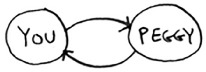

Here's the final code for breadth-first search, with additional functionality to check if a person has been checked already:

In [11]:
from collections import deque

def person_is_seller(name):
  return name[-1] == 'm'

def search(name):

  search_queue = deque()
  search_queue += graph[name]
  searched = [] # this array is how you keep track of which people you've searched before

  while search_queue:
    person = search_queue.popleft()
    if not person in searched: # only search this person if you haven't already searched them
      if person_is_seller(person):
        print(person + " is a mango seller!")
        return True
      else:
        search_queue += graph[person]
        searched.append(person) # marks this person as searched
  return False

In [13]:
search("claire")

thom is a mango seller!


True

Suppose you have a family tree.

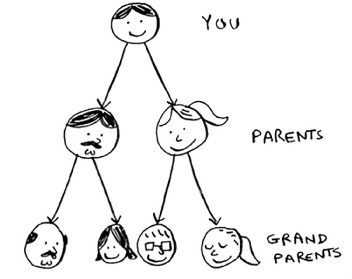

This is a graph, because you have nodes (the people) and edges. The edges point to the nodes' parents. But all the edges go down - it wouldn't make sense for a family tree to have an edge pointing back up! This would be meaningless - your dad can't be your grandfather's dad!

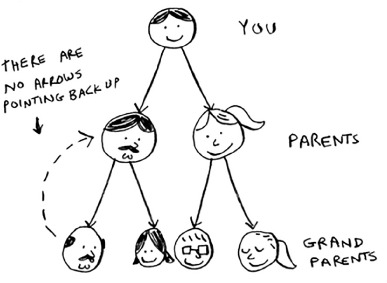

This is called a tree. A tree is a special type of graph, where no edges ever point back.